<a href="https://colab.research.google.com/github/ManG0A2/MLP-class/blob/main/%EA%B3%BC%EC%A0%9C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
from google.colab import drive

In [66]:
#데이터 불러오기 및 확인

titanic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gender_submission.csv")
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
#Sex 와 Embarked -> 이 두 범주형 데이터를 정수로 바꿔서 넘파이 배열에 적합하게 만들도록 하겠다.

train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1,'Q':2})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1,'Q':2})

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1.0


In [68]:
#결측치 확인
print(train_data.isnull().sum(axis=0))
print(test_data.isnull().sum(axis=0))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [69]:
#결측치 처리
#1. Cabin과 Embarked는 사용하지 않을 예정이기에 아얘 삭제했다.
#2. Age 와 Fare 결측치에 대해서는 평균값으로 결측치를 채웠다.

train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

train_data = train_data.drop(['Embarked'], axis=1)
test_data = test_data.drop(['Embarked'], axis=1)

train_age_mean = train_data['Age'].mean()
test_age_mean = test_data['Age'].mean()

train_data['Age'] = train_data['Age'].fillna(train_age_mean)
test_data['Age'] = test_data['Age'].fillna(test_age_mean)

test_Fare_mean = test_data['Fare'].mean()
test_data['Fare'] = test_data['Fare'].fillna(test_Fare_mean)

In [70]:
#결측치가 사라진 모습이다.

print(train_data.isnull().sum(axis=0))

print(test_data.isnull().sum(axis=0))

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64


In [71]:
#넘파이 배열로

train_input = train_data[['Pclass','Sex','Age','SibSp','Parch','Fare']].to_numpy()
train_target =train_data['Survived'].to_numpy()

test_input = test_data[['Pclass','Sex','Age','SibSp','Parch','Fare']].to_numpy()
test_target = tt['Survived'].to_numpy()

In [72]:
#정규화

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [73]:
'''
타이타닉 데이터 세트를 이용하여
* SGD분류,
* 결정트리,
* 랜덤포래스트,
* 히스토그램기반 그래디언트 부스팅

모델을 만들고 최적화.
'''

'\n타이타닉 데이터 세트를 이용하여\n* SGD분류,\n* 결정트리,\n* 랜덤포래스트,\n* 히스토그램기반 그래디언트 부스팅\n\n모델을 만들고 최적화.\n'

In [74]:
#SGD Classifier(확률적 경사하강법)

from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=202133532)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7194163860830527
0.7320574162679426


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [75]:
#전진적 학습 실행

sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.6296296296296297
0.5741626794258373


In [76]:
sc = SGDClassifier(loss='log', random_state=202133532)
train_score = []
test_score = []
classes = np.unique(train_target)

In [77]:
for _ in range(0, 50):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


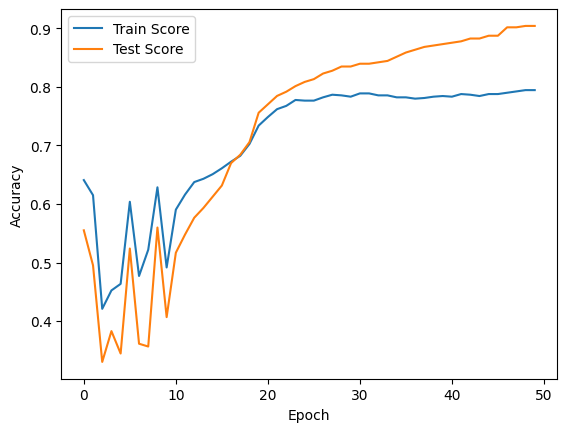

In [78]:
import matplotlib.pyplot as plt

plt.plot(train_score, label='Train Score')
plt.plot(test_score, label='Test Score')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [79]:
sc = SGDClassifier(loss='log', max_iter=30, tol=None, random_state=202133532)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7687991021324355
0.7751196172248804


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [80]:
#결정트리

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=202133532)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9820426487093153
0.8038277511961722


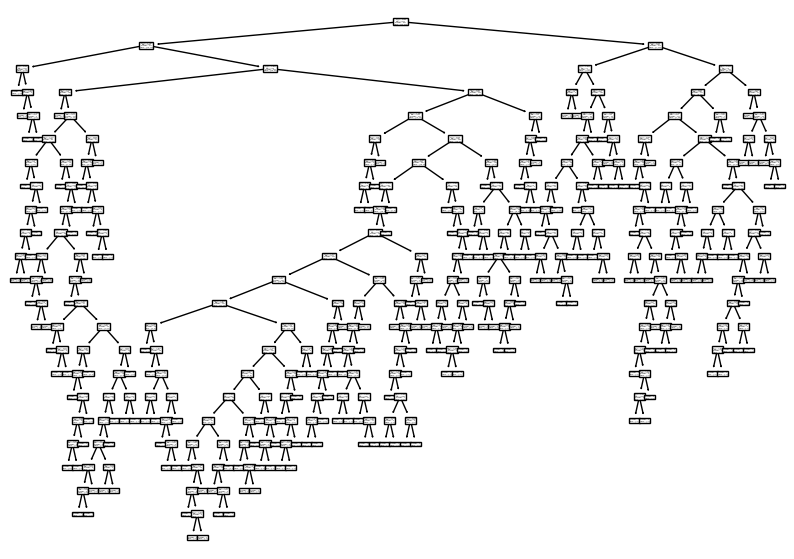

In [81]:
#매우 과적합된 모델이다.
#일단 대충 트리 구조를 눈으로 확인하자. 그래야지 몇층으로 줄일지 결정이 될 것 같다,

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

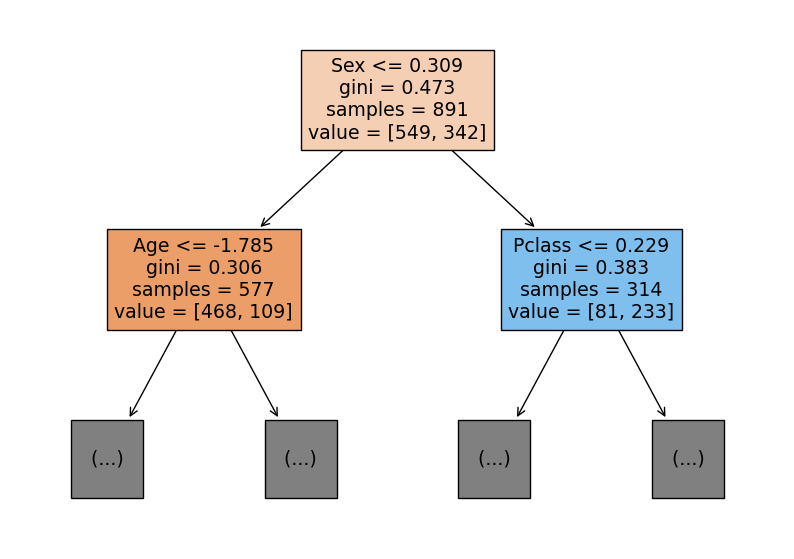

In [82]:
#max_depth 매개변수를 1로 주면 루트 노드를 제외하고 하나의 노드를 더 확장하여 그린다.
#자동으로 나눈 기준을 확인해보자

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare'])
plt.show()

In [83]:
#그렇다면 이제 max_depth 를 몇으로 해야 최선의 결과가 나타나는지 확인해보겠다.
#for문 최대횟수를 25로 한 이유는 위 첫번째 트리가 루트노트가 약 25~30층정도 되는것 같아 보였기 때문이다.

train_score = []
test_score = []
for i in range(1,25):
  dt = DecisionTreeClassifier(max_depth=i, random_state=202133532)
  dt.fit(train_scaled, train_target)

  train_score.append(dt.score(train_scaled, train_target))
  test_score.append(dt.score(test_scaled, test_target))

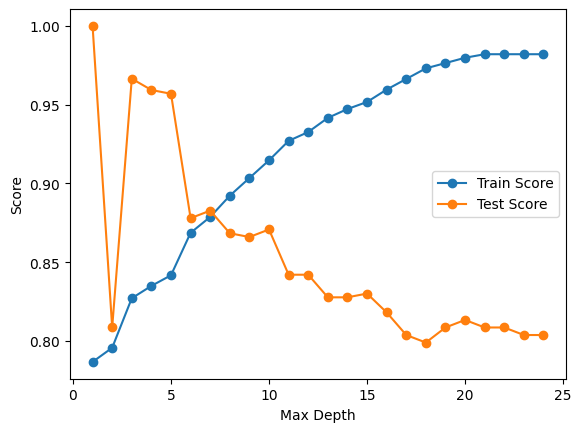

In [84]:
plt.plot(range(1, 25), train_score, label='Train Score', marker='o')
plt.plot(range(1, 25), test_score, label='Test Score', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.legend()
plt.show()

In [85]:
#max_depth 8일때 나오는 결과가 최선인 것 같아보인다.

dt = DecisionTreeClassifier(max_depth=8, random_state=202133532)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8922558922558923
0.868421052631579


In [86]:
#랜덤 포레스트

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=202133532)

scores = cross_validate( rf, train_input, train_target,
                       return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9845678963707707 0.8070114870378507


In [87]:
#최적의 하이퍼파라메타를 찾아보자

from scipy.stats import uniform, randint

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
         'max_depth': randint(20, 50),
         'min_samples_split': randint(2, 25),
         'min_samples_leaf': randint(1,25),
         }

In [88]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(RandomForestClassifier(random_state=202133532), params,
                                              n_iter=100, n_jobs=-1, random_state=202133532)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=202133532),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x781f344ab820>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x781f3476bd30>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x781f344ab280>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x781f347684c0>},
                   random_state=202133532)

In [89]:
print(gs.best_params_)

{'max_depth': 30, 'min_impurity_decrease': 0.00012553181536531947, 'min_samples_leaf': 3, 'min_samples_split': 6}


In [90]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, max_depth=30,min_impurity_decrease=0.00012553181536531947, min_samples_leaf= 3, min_samples_split= 6,random_state=202133532)

scores = cross_validate( rf, train_input, train_target,
                       return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8897320232598451 0.8305693302366455


In [91]:
#히스토그램기반 그래디언트 부스팅

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=202133532)
scores = cross_validate(hgb, train_input, train_target,
                       return_train_score=True)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9407965236301747 0.8249513527085558


In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_iter': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

hgb2 = HistGradientBoostingClassifier(random_state=202133532)

grid_search = GridSearchCV(hgb, param_grid, cv=3)
grid_search.fit(train_input, train_target)

GridSearchCV(cv=3,
             estimator=HistGradientBoostingClassifier(random_state=202133532),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'max_iter': [100, 150, 200]})

In [93]:
print(grid_search.best_params_)

{'learning_rate': 0.05, 'max_depth': 5, 'max_iter': 200}


In [94]:
hgb = HistGradientBoostingClassifier(learning_rate = 0.05, max_depth = 5, max_iter = 200,random_state=202133532)
scores = cross_validate(hgb, train_input, train_target,
                       return_train_score=True)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8967430701104686 0.8361621994852803
